In [2]:
!pip install praw


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 5.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import praw

In [4]:
# Reddit API Credentials (Replace with your actual credentials)
reddit = praw.Reddit(
    client_id="xPzurun0NRckrm1Fdl96xA",
    client_secret="pFSLDTdyTZO114dVQ1WmhdcU3ASARA",
    user_agent="TravelNetworking02 by Otherwise_Tennis_265"
)

In [5]:
# Define subreddits to scrape (including group travel)
subreddits = ["solotravel", "travel", "backpacking", "grouptours", "travelpartners"]

# Search query (Now includes "group travel")
#query = "solo travel OR group travel OR solo vs group travel OR group tours"
query = '"solo travel" OR "group travel" OR "solo vs group travel" OR "group tours" OR "traveling alone" OR "traveling in a group"'

# List to store extracted data
data = []

# Fetch posts from each subreddit
for subreddit in subreddits:
    subreddit_obj = reddit.subreddit(subreddit)

    for submission in subreddit_obj.search(query, limit=100):  # Fetch top 100 relevant posts
        data.append({
            "id": submission.id,
            "subreddit": subreddit,
            "title": submission.title,
            "text": submission.selftext,
            "upvotes": submission.score,
            "comments": submission.num_comments,
            "url": submission.url
        })

# Convert to DataFrame
df = pd.DataFrame(data)

# Save data to CSV
df.to_csv("reddit_solo_vs_group_travel.csv", index=False)
print("✅ Data collected and saved to reddit_solo_vs_group_travel.csv")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

✅ Data collected and saved to reddit_solo_vs_group_travel.csv


In [11]:
import pandas as pd

# Load the CSV file
travel_df = pd.read_csv("reddit_solo_vs_group_travel.csv")  # Replace with your actual filename

# Check the first few rows
print(df.head())




        id   subreddit                                              title  \
0  1ifxsdd  solotravel          Ending my relationship after solo travel!   
1  1f1r9le  solotravel  First day solo travelling and it was of the wo...   
2  1hbbhks  solotravel                 The real reason why I solo travel?   
3  1fvcz74  solotravel  Feeling very exhausted from racism on solo tra...   
4  1gzp3iu  solotravel                Why is SOLO travel such a big deal?   

                                                text  upvotes  comments  \
0  \nI (24F) just completed my first solo backpac...     2124       394   
1  Last night I checked into a hostel. It was wel...     3061       254   
2  Before I get into it, yes, I acknowledge I nee...     1691       226   
3  26 W black travelling in Mexico to visit my fr...      871       862   
4  I always travel solo, and I often get comments...      615       362   

                                                 url  
0  https://www.reddit.com/r/sol

In [12]:
# Check the number of comments per post
print(travel_df["comments"].describe())  # Gives stats like min, max, average number of comments

count     400.000000
mean      121.982500
std       194.819259
min         0.000000
25%         4.750000
50%        33.000000
75%       184.250000
max      2168.000000
Name: comments, dtype: float64


In [13]:
print(f"Total Comments: {travel_df['comments'].sum()}")


Total Comments: 48793


In [10]:
# Data Cleaning & Preprocessing

In [14]:
# Remove duplicate posts (if any)
travel_df = travel_df.drop_duplicates()

# Remove posts with missing text
travel_df= travel_df.dropna(subset=['text'])

# Convert text to lowercase
travel_df["text"] = travel_df["text"].str.lower()

# Save the cleaned data
travel_df.to_csv("cleaned_travel_data.csv", index=False)


In [16]:
import spacy

# Load Spacy model
nlp = spacy.load("en_core_web_sm")

# Function to extract locations
def extract_locations(text):
    text = str(text)
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "GPE"]  # GPE = Geo-Political Entity (countries, cities)

# Apply to dataset
df["locations"] = df["text"].apply(extract_locations)

# Save extracted locations
df.to_csv("locations_extracted.csv", index=False)


In [18]:
 # Construct the Network Using NetworkX

In [17]:
!pip install networkx


In [19]:
# Create a Destination Co-occurrence Network

In [20]:
import networkx as nx
from itertools import combinations

# Initialize graph
G = nx.Graph()

# Iterate through extracted locations
for locations in df["locations"]:
    locations = list(set(locations))  # Remove duplicates within the same post
    for loc1, loc2 in combinations(locations, 2):  # Create edges for co-occurring locations
        if G.has_edge(loc1, loc2):
            G[loc1][loc2]["weight"] += 1
        else:
            G.add_edge(loc1, loc2, weight=1)

# Save the network
nx.write_gexf(G, "travel_network.gexf")


In [21]:
#Visualize the Network

In [23]:
# Remove unwanted terms
invalid_nodes = ["https", "www", "thank you", "nov", "nm"]  # Add more based on inspection
G.remove_nodes_from(invalid_nodes)


In [25]:
pos = nx.spring_layout(G, seed=42, k=0.3)  # Increase k to spread out nodes


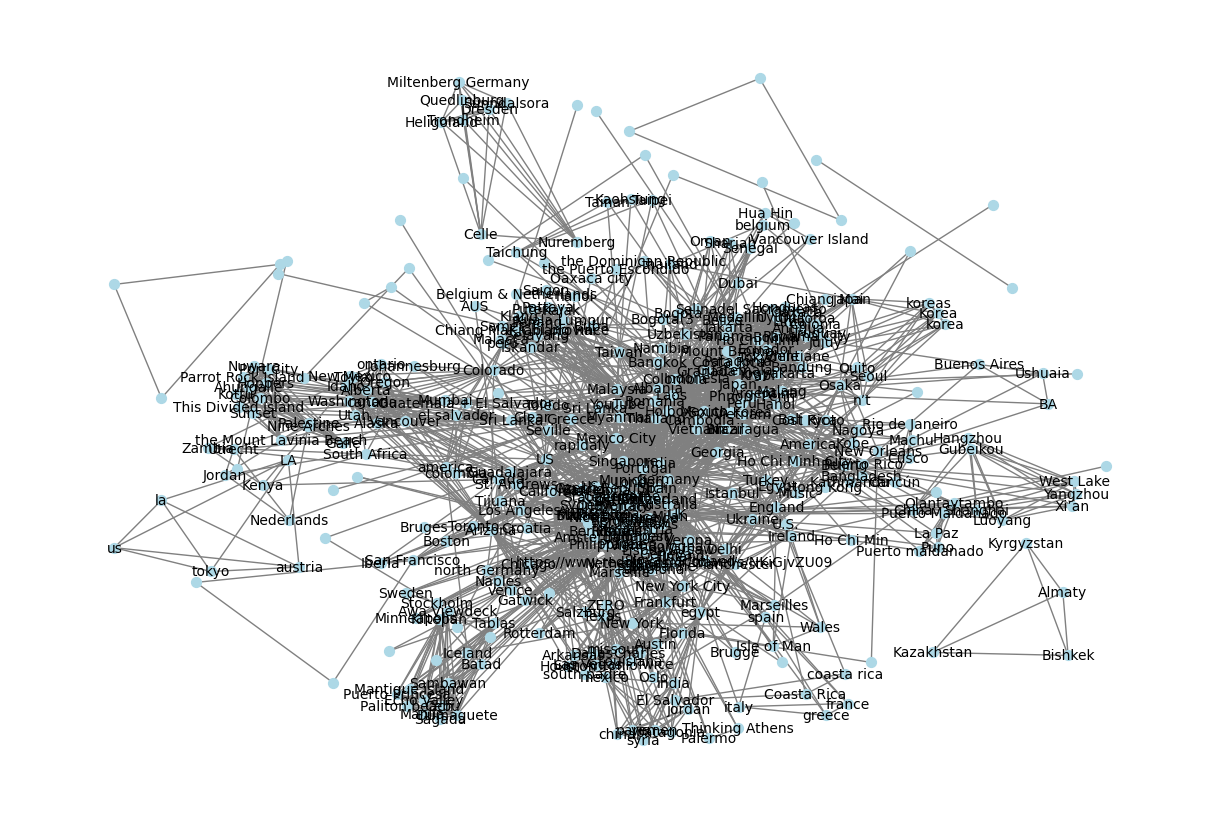

In [26]:
important_nodes = [node for node, degree in dict(G.degree()).items() if degree > 2]  # Label only active nodes

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_size=50, node_color="lightblue", edge_color="gray")
nx.draw_networkx_labels(G, pos, labels={node: node for node in important_nodes}, font_size=10)
plt.show()


Filtered Graph - Nodes: 93, Edges: 483


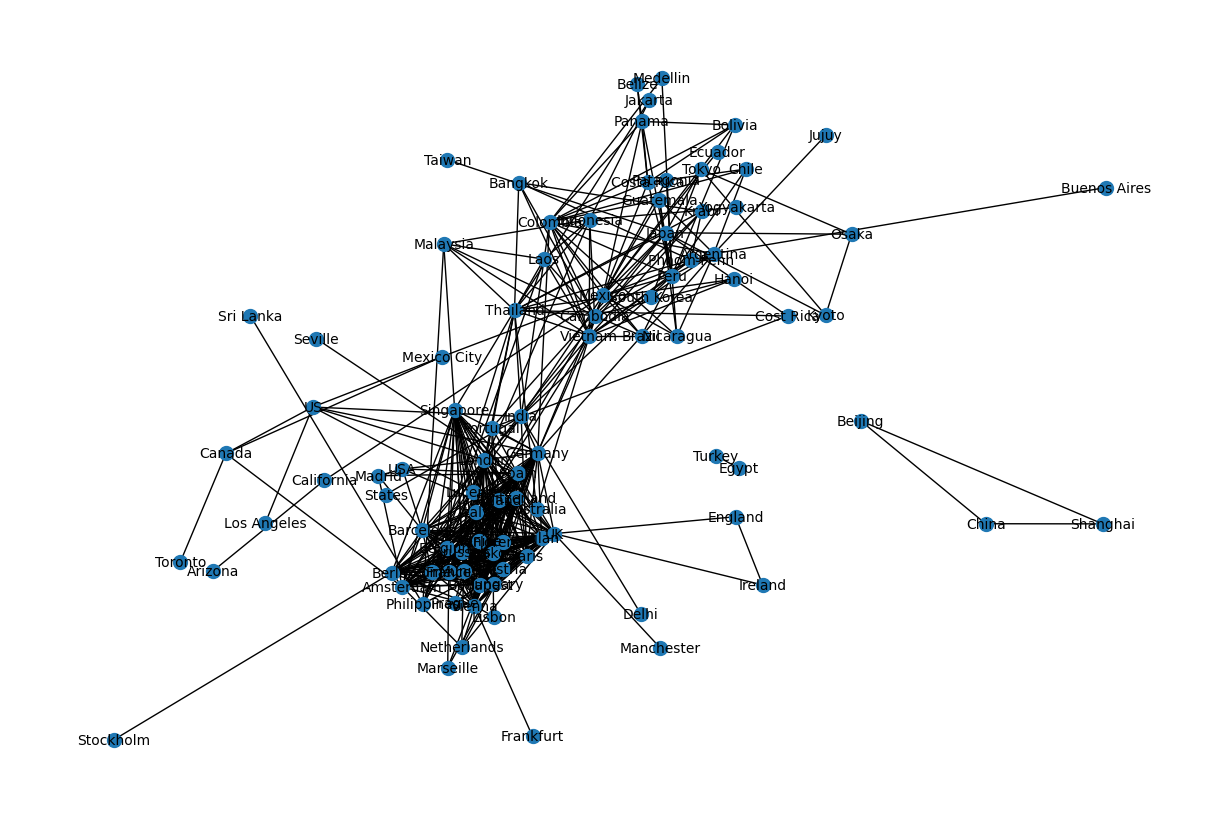

In [27]:
# Keep only edges that appear at least twice
G_filtered = nx.Graph()
for u, v, data in G.edges(data=True):
    if data["weight"] > 1:  # Adjust threshold as needed
        G_filtered.add_edge(u, v, weight=data["weight"])

print(f"Filtered Graph - Nodes: {len(G_filtered.nodes)}, Edges: {len(G_filtered.edges)}")

# Redraw with filtered graph
plt.figure(figsize=(12, 8))
nx.draw(G_filtered, pos, with_labels=True, node_size=100, font_size=10)
plt.show()


In [28]:
centrality = nx.degree_centrality(G_filtered)
top_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 most connected destinations:", top_nodes)


Top 10 most connected destinations: [('Germany', 0.34782608695652173), ('UK', 0.33695652173913043), ('London', 0.31521739130434784), ('Spain', 0.30434782608695654), ('Amsterdam', 0.30434782608695654), ('Vienna', 0.30434782608695654), ('Singapore', 0.2934782608695652), ('Munich', 0.2934782608695652), ('Budapest', 0.2826086956521739), ('Barcelona', 0.2826086956521739)]


In [29]:
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G_filtered))
print("Detected communities:", [list(c) for c in communities[:5]])  # Show first 5


Detected communities: [['England', 'Budapest', 'Germany', 'Madrid', 'Krakow', 'London', 'Milan', 'Singapore', 'Seville', 'France', 'Switzerland', 'UK', 'Barcelona', 'Brussels', 'Netherlands', 'Rome', 'Stockholm', 'Austria', 'Italy', 'Venice', 'Berlin', 'Poland', 'Manchester', 'Frankfurt', 'Belgium', 'USA', 'Munich', 'Marseille', 'Spain', 'Lucerne', 'Florence', 'Ireland', 'Hungary', 'Paris', 'Prague', 'Amsterdam', 'Vienna'], ['Laos', 'Chile', 'Krabi', 'Argentina', 'Bangkok', 'Thailand', 'Australia', 'Medellin', 'Buenos Aires', 'California', 'Nicaragua', 'Sri Lanka', 'Brazil', 'Malaysia', 'Patagonia', 'Guatemala', 'Yogyakarta', 'Jakarta', 'Hanoi', 'Mexico', 'Vietnam', 'Phnom Penh', 'Belize', 'Bolivia', 'India', 'Panama', 'Indonesia', 'Costa Rica', 'Ecuador', 'Delhi', 'States', 'Cambodia', 'Jujuy', 'Peru', 'Philippines', 'Arizona', 'Colombia'], ['Japan', 'Osaka', 'Taiwan', 'Kyoto', 'Lisbon', 'Tokyo', 'Portugal', 'South Korea', 'Cost Rica'], ['Toronto', 'Mexico City', 'Canada', 'US', 'Los 

In [31]:
!pip install community


In [32]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

# Detect communities
communities = list(greedy_modularity_communities(G_filtered))  # G_filtered is your cleaned graph

# Assign each node to a community
node_community_map = {}
for i, community in enumerate(communities):
    for node in community:
        node_community_map[node] = i  # Assign each node to a community index

print(f"Detected {len(communities)} communities")


Detected 6 communities


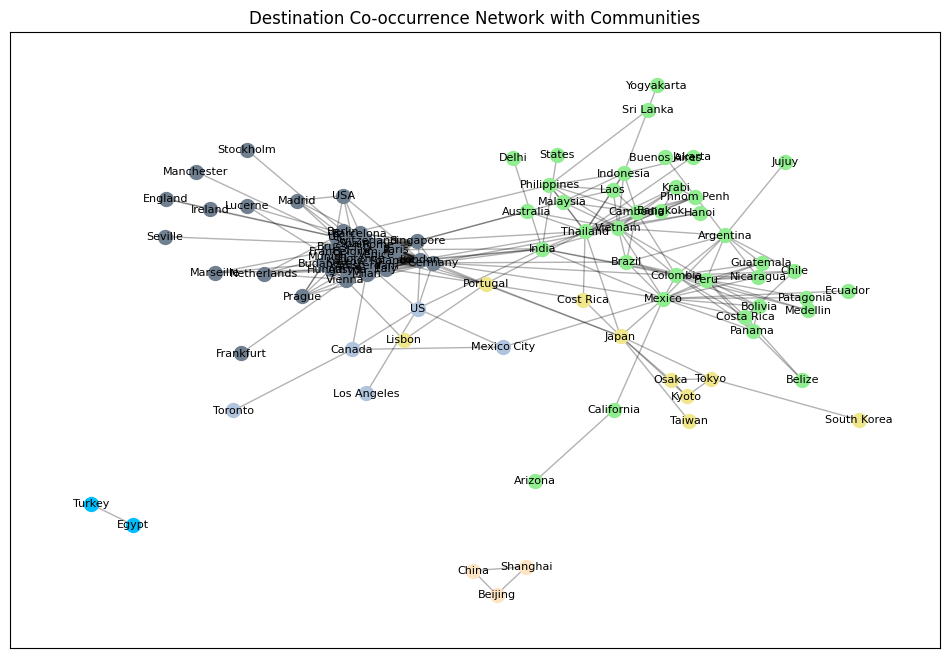

In [33]:
import matplotlib.colors as mcolors
import random

# Generate random colors for each community
colors = list(mcolors.CSS4_COLORS.values())
random.shuffle(colors)
community_colors = {i: colors[i % len(colors)] for i in range(len(communities))}

# Draw graph with community colors
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_filtered, seed=42, k=0.3)

for node in G_filtered.nodes():
    nx.draw_networkx_nodes(G_filtered, pos, nodelist=[node], node_color=community_colors[node_community_map[node]], node_size=100)

nx.draw_networkx_edges(G_filtered, pos, alpha=0.3)
nx.draw_networkx_labels(G_filtered, pos, font_size=8)

plt.title("Destination Co-occurrence Network with Communities")
plt.show()


In [34]:
# Find the largest travel groups:

In [35]:
sorted_communities = sorted(communities, key=len, reverse=True)
print("Top 3 largest travel destination groups:")
for i, community in enumerate(sorted_communities[:3]):
    print(f"Community {i+1} ({len(community)} destinations): {list(community)}")


Top 3 largest travel destination groups:
Community 1 (37 destinations): ['England', 'Budapest', 'Germany', 'Madrid', 'Krakow', 'London', 'Milan', 'Singapore', 'Seville', 'France', 'Switzerland', 'UK', 'Barcelona', 'Brussels', 'Netherlands', 'Rome', 'Stockholm', 'Austria', 'Italy', 'Venice', 'Berlin', 'Poland', 'Manchester', 'Frankfurt', 'Belgium', 'USA', 'Munich', 'Marseille', 'Spain', 'Lucerne', 'Florence', 'Ireland', 'Hungary', 'Paris', 'Prague', 'Amsterdam', 'Vienna']
Community 2 (37 destinations): ['Laos', 'Chile', 'Krabi', 'Argentina', 'Bangkok', 'Thailand', 'Australia', 'Medellin', 'Buenos Aires', 'California', 'Nicaragua', 'Sri Lanka', 'Brazil', 'Malaysia', 'Patagonia', 'Guatemala', 'Yogyakarta', 'Jakarta', 'Hanoi', 'Mexico', 'Vietnam', 'Phnom Penh', 'Belize', 'Bolivia', 'India', 'Panama', 'Indonesia', 'Costa Rica', 'Ecuador', 'Delhi', 'States', 'Cambodia', 'Jujuy', 'Peru', 'Philippines', 'Arizona', 'Colombia']
Community 3 (9 destinations): ['Japan', 'Osaka', 'Taiwan', 'Kyoto', 

In [36]:
#Identify the most central destinations in each community:

In [37]:
for i, community in enumerate(sorted_communities[:3]):  # Top 3 communities
    subgraph = G_filtered.subgraph(community)
    centrality = nx.degree_centrality(subgraph)
    top_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"Top 5 destinations in Community {i+1}: {top_nodes}")


Top 5 destinations in Community 1: [('UK', 0.8055555555555555), ('Munich', 0.75), ('Spain', 0.75), ('Vienna', 0.75), ('Budapest', 0.7222222222222222)]
Top 5 destinations in Community 2: [('Vietnam', 0.4722222222222222), ('Mexico', 0.38888888888888884), ('Peru', 0.38888888888888884), ('Colombia', 0.38888888888888884), ('Thailand', 0.3611111111111111)]
Top 5 destinations in Community 3: [('Japan', 0.75), ('Tokyo', 0.5), ('Osaka', 0.375), ('Kyoto', 0.375), ('Portugal', 0.375)]


In [38]:
# Count posts from solo vs. group travel subreddits
solo_posts = df[df["subreddit"] == "solotravel"]
group_posts = df[df["subreddit"] == "grouptours"]

print(f"Solo Travel Posts: {len(solo_posts)}")
print(f"Group Travel Posts: {len(group_posts)}")


Solo Travel Posts: 100
Group Travel Posts: 0
